In [88]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from skimage.feature import canny
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, show
from bokeh.charts import Histogram
import seaborn
from scipy import stats
from ipywidgets import interact

In [3]:
output_notebook()

Loading BokehJS ...

In [28]:
io.use_plugin('matplotlib', 'imread')
hair = io.imread("2.png")[260:650,100:280,:]

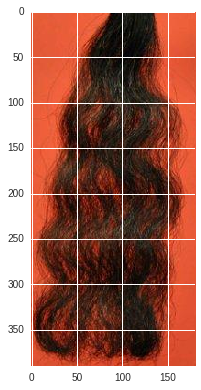

In [29]:
fig = io.imshow(hair)

In [ ]:
#io.use_plugin('matplotlib', 'imsave')
from io import BytesIO, StringIO
import base64
test_byte = BytesIO()
test_str = StringIO()
plt.imshow(hair)
plt.savefig(test_str,format='svg')

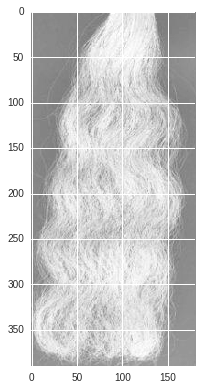

In [9]:
hair_bw = 1 - rgb2gray(hair[260:650,100:280,:])
io.imshow(hair_bw)

In [10]:
hair_bw[0,0]

0.072099999999999942

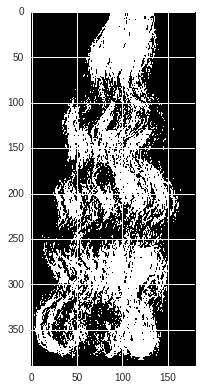

In [66]:
## Turn the image into a binary image. Use a threshold value
threshold = 0.15
hair_binary = np.where(hair_bw > 1-threshold, 1.0, 0.0)
io.imshow(hair_binary)

In [110]:
hair_canny = canny(hair_bw, 1.5)


(0, 180, 390, 0)

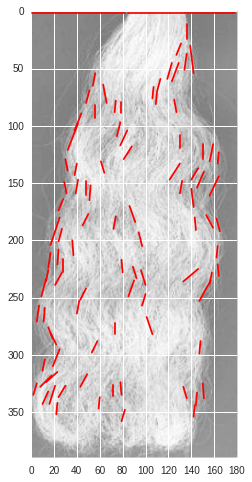

In [112]:
lines =probabilistic_hough_line(hair_canny, threshold = 0, line_length=10, line_gap=1)
fig, ax = plt.subplots(1,1,figsize = (10,8))
r,c = hair_bw.shape
ax.imshow(hair_bw, cmap = plt.cm.gray)
angles = []
for line in lines:
    p0, p1 = line
    ax.plot((p0[0],p1[0]),(p0[1],p1[1]), 'r-')
    try:
        temp = np.rad2deg(np.arctan((p1[1] - p0[1]) / (p1[0] - p0[0])))
    except ZeroDivisionError:
        temp = 90
    if temp < 0:
        temp +=180
    angles.append(temp)
ax.axis((0,c,r,0))

(array([   2.,    0.,    0.,    2.,   68.,  216.,  233.,   32.,    4.,    1.]),
 array([   0.        ,   16.33007558,   32.66015115,   48.99022673,
          65.32030231,   81.65037788,   97.98045346,  114.31052904,
         130.64060461,  146.97068019,  163.30075577]),
 <a list of 10 Patch objects>)

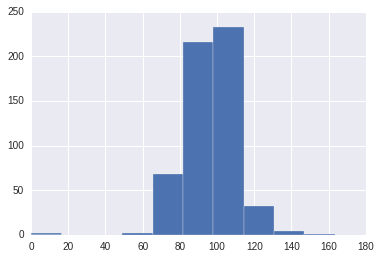

In [104]:
plt.hist(angles)

In [57]:
p = figure(plot_width=400, plot_height=400, x_range=(0, 10), y_range=(0, 10))

p.image_rgba(image=[hair], x=[0], y=[0], dw=[10], dh=[10])

show(p)

In [12]:
angle_p = Histogram(angles, bins=20)
show(angle_p)

In [14]:
param = stats.norm.fit(angles)

In [15]:
min_x = np.min(angles)
max_x = np.max(angles)
axis_x = np.linspace(min_x, max_x, num=100)
density_fun = stats.norm.pdf(axis_x,loc=param[0],scale=param[1])

In [16]:
(hist_y, hist_x) = np.histogram(angles,bins=20)
factor = np.max(hist_y)/np.max(density_fun)
hist_bokeh = figure()
tops = []
bottoms = []
lefts = []
rights = []
for i in range(len(hist_y)):
    tops.append(hist_y[i])
    bottoms.append(0)
    lefts.append(hist_x[i])
    rights.append(hist_x[i+1])

In [113]:
histogram_bokeh = figure()
histogram_bokeh.quad(top=tops,bottom=bottoms,left=lefts,right=rights,line_width=2,line_color='black')
histogram_bokeh.line(axis_x,density_fun*factor, color='red')
show(histogram_bokeh)

In [105]:
print('Angle mean is:{0:.2f}'.format(np.mean(angles)))
print('Angle standard deviation is: {0:.2f}'.format(np.std(angles)))
print('Kurtosis is: {0:.2f}'.format(stats.kurtosis(angles)))
print('Skeness is: {0:.2f}'.format(stats.skew(angles)))

Angle mean is:96.06
Angle standard deviation is: 13.96
Kurtosis is: 7.19
Skeness is: -0.76
